In [ ]:
# Bibliotecas a serem instaladas

# pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [3]:
# Abrir  o dataset

df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [5]:
# Visualizar estrutura dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
# Visualizar as 10 primeiras linhas do dataset

df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


### EDA

In [7]:
# Medidas estatisticas das variaveis

df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

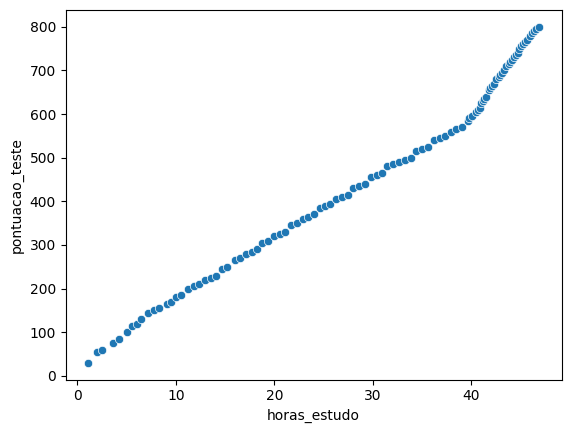

In [9]:
# Plot de Dispersao

# x = horas_estudos
# y = pontuacao_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

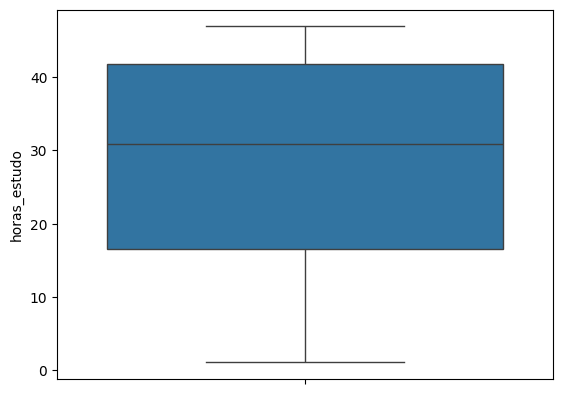

In [10]:
# Verificar se temos outliers

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

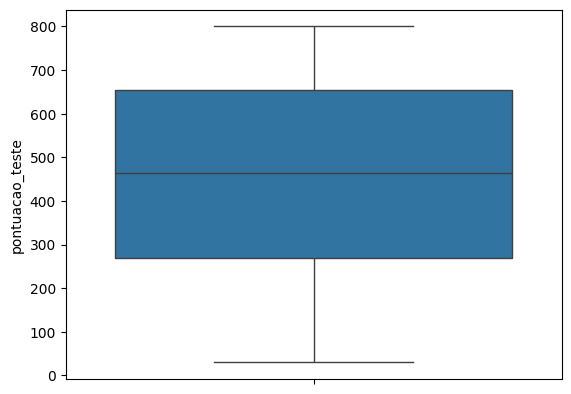

In [11]:
# Verificar se temos outliers

sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

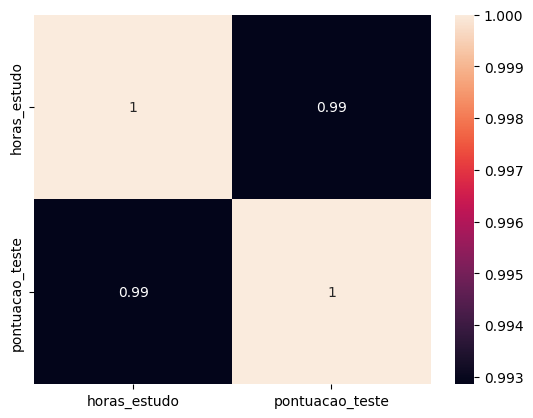

In [12]:
# Verificar Correlacao - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

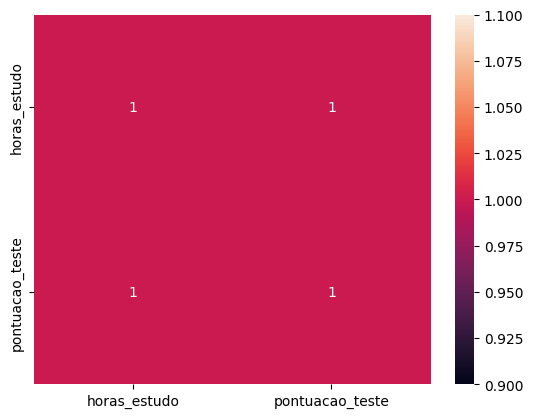

In [13]:
# Verificar Correlacao - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

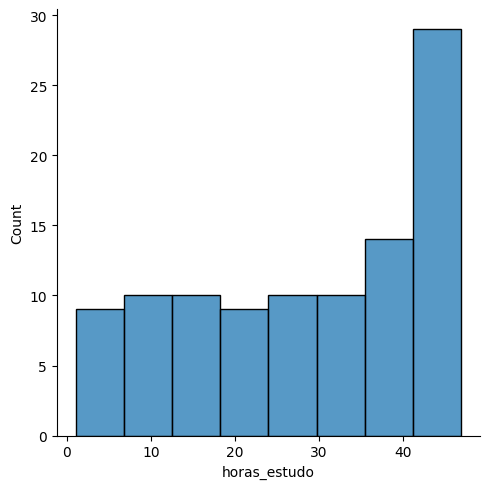

In [14]:
# Histograma das variaveis 

sns.displot(df_pontuacao, x='horas_estudo')

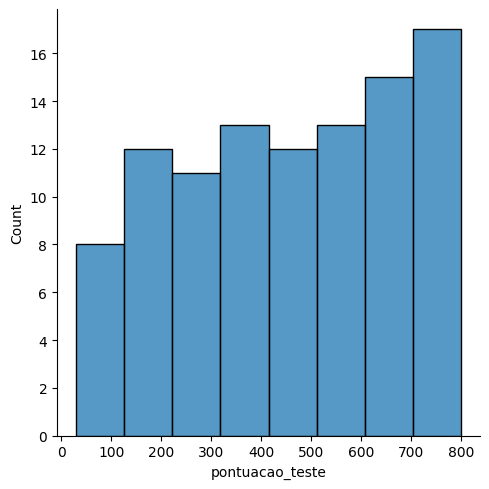

In [15]:
# Histograma das variaveis 

sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo

In [16]:
# Dividir dataset entre treino e teste

# Quando temos apenas uma feature, precisamos ajustar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [17]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [18]:
# Treinar o modelo

reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Imprimir a equacao da reta
# y = aX + b

print("A equacao da reta e y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equacao da reta e y = 15.642619x + 8.476601


### Validar Modelo - Metricas

In [21]:
# Predicao dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)

In [22]:
# Calcular metrica - R-squared ou Coeficiente de determinacao

# R2 representa a proporcao na variacao na variavel dependente que e explicada pela variavel independente 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [23]:
# Calcular metrica MAE ( Mean Absolute Error)

# MAE = Media (y_test - y_pred)
# E uma metrica facil de interpretar
# MAE e menos sensivel a outliers

mean_absolute_error(y_test, y_pred)

22.957470277134636

In [24]:
# Calcular metrica MSE (Mean Squared Error)
# MSE = Media (y_test - y_pred)2
# Nao e uma metrica facil de interpretar
# MSE e mais sensivel a outliers e penaliza grande erros

mean_squared_error(y_test, y_pred)

766.9972992416428

In [33]:
# Calcular metrica RMSE (Square Root Mean Squared Error)
# MSE = Raiz (Media (y_test - y_pred)2)
# E uma metrica facil de interpretar
# MSE e mais sensivel a outliers e penaliza grande erros

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
rmse

np.float64(27.694716088843425)

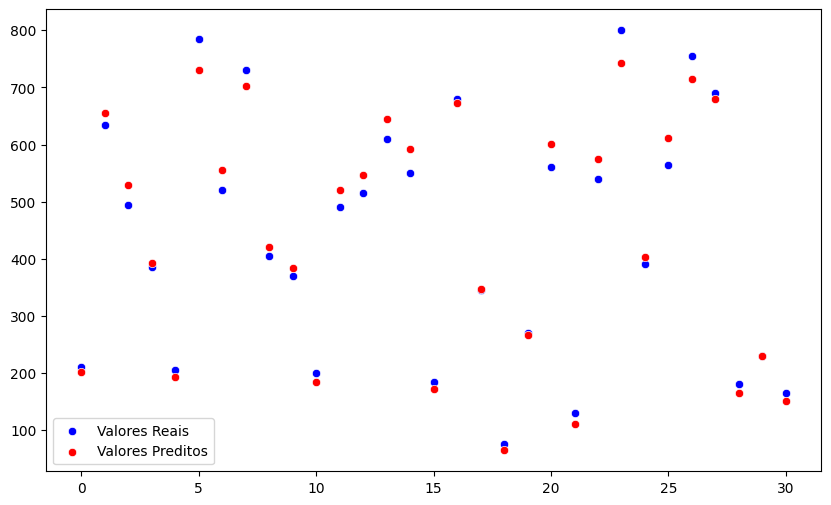

In [35]:
# Analise Grafica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Analise de Residuos

In [36]:
# Calcular residuos

residuos = y_test - y_pred

In [37]:
# Calcular os residuos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

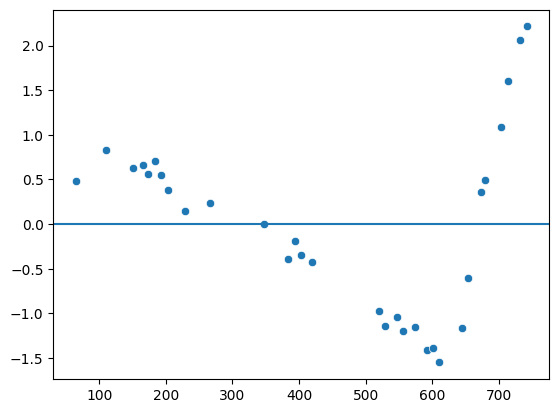

In [38]:
# Verificar linearidade do modelo:
# Se os residuos esiver entre -2 e + 2 (na escala padrao) - indica linearidade

# Verificar homogeneidade das variancias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrario
# Se tivermos alguma tendencia ou padrao (formam um cone, funil), ha heterocedasticidade


sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)


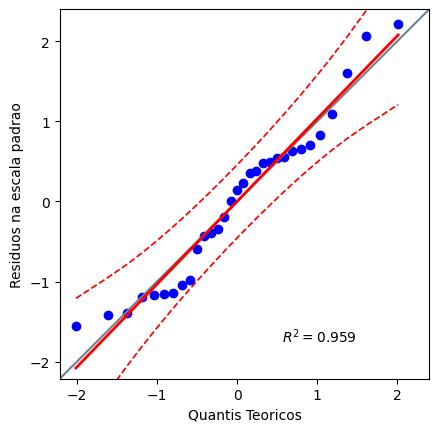

In [39]:
# Checar se residuos seguem uma distribuicao normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuicao normal

import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Residuos na escala padrao')
plt.show()

In [41]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuicao normal
# H1 - Nao segue distribuicao normal
# Se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos

stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatistica do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))


Estatistica do teste: 0.950053222616176 e P-valor: 0.15663817850305037


In [42]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuicao normal
# H1 - Nao segue distribuicao normal
# Se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatistica do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

Estatistica do teste: 0.4835580845051284 e P-valor: 3.3953689958140517e-07


### Fazer predicoes com o modelo 

In [43]:
# Se eu estudar 30.4 horas. qual a pontuacao prevista pelo modelo ?

reg_model.predict([[30.4]])

array([[484.01220436]])

In [44]:
# Quantas horas estiudar para obter 600 pontos (pelo modelo)?

# y = ax + b
# y - b = ax
# x = (y -b) / a

(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar depois

In [45]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']